In [ ]:
!pip3 install torch

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))
print(y.shape)

(100,)


In [3]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

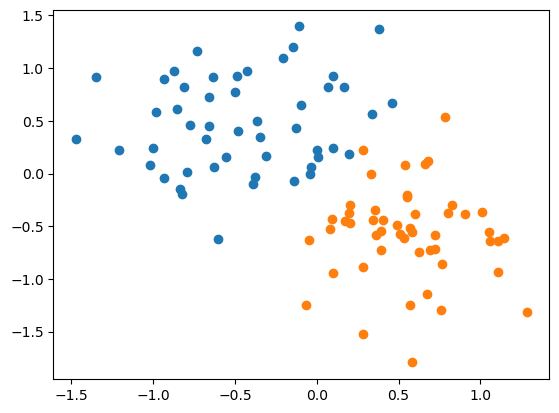

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):

    def __init__(self, input_size, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
      pred = torch.sigmoid(self.linear(x))
      return pred

    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [6]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [7]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [8]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2, 2])
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()
  plt.show()

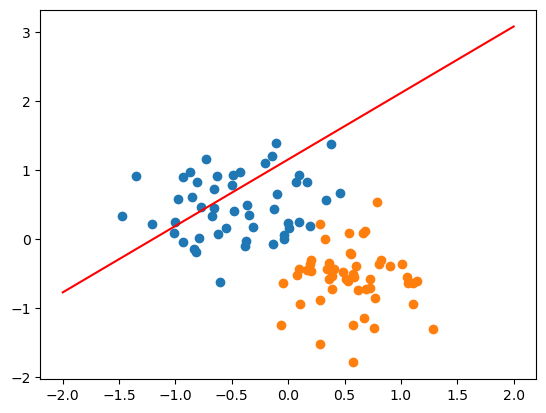

In [9]:
plot_fit('Initial Model')

In [10]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.6185115575790405
epoch: 1 loss: 0.617464005947113
epoch: 2 loss: 0.6164200305938721
epoch: 3 loss: 0.6153795123100281
epoch: 4 loss: 0.6143423318862915
epoch: 5 loss: 0.6133086681365967
epoch: 6 loss: 0.612278401851654
epoch: 7 loss: 0.6112514734268188
epoch: 8 loss: 0.6102280020713806
epoch: 9 loss: 0.6092078685760498
epoch: 10 loss: 0.6081911325454712
epoch: 11 loss: 0.607177734375
epoch: 12 loss: 0.6061676740646362
epoch: 13 loss: 0.6051609516143799
epoch: 14 loss: 0.604157567024231
epoch: 15 loss: 0.6031573414802551
epoch: 16 loss: 0.6021605730056763
epoch: 17 loss: 0.6011670231819153
epoch: 18 loss: 0.6001767516136169
epoch: 19 loss: 0.5991896986961365
epoch: 20 loss: 0.5982059240341187
epoch: 21 loss: 0.5972253680229187
epoch: 22 loss: 0.5962480306625366
epoch: 23 loss: 0.5952739119529724
epoch: 24 loss: 0.5943029522895813
epoch: 25 loss: 0.5933352112770081
epoch: 26 loss: 0.5923706293106079
epoch: 27 loss: 0.5914091467857361
epoch: 28 loss: 0.5904508233070374
ep

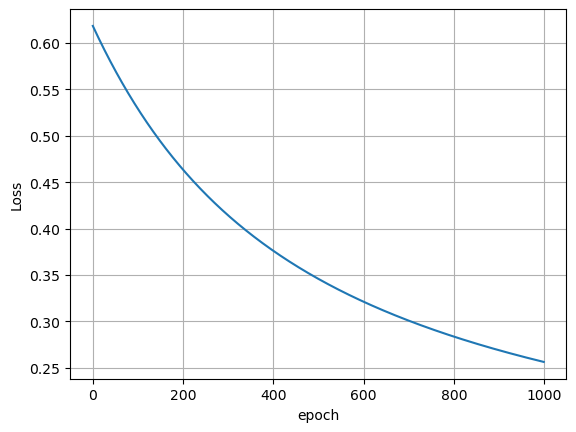

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

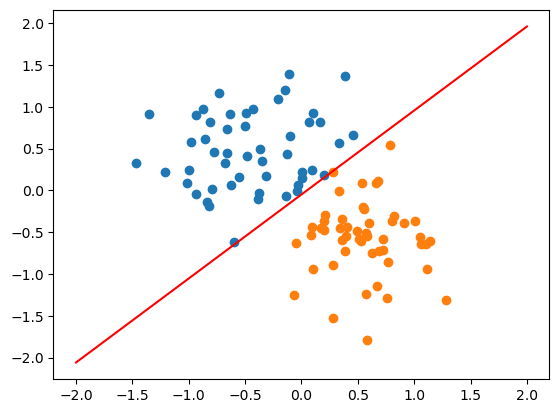

In [13]:
plot_fit("Trained Model")


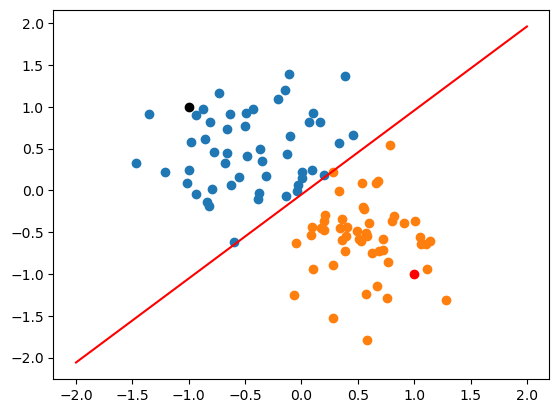

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point belongs in class 1
Black point belongs in class = 0


In [14]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit("Trained Model")
print("Red point positive probability = {}".format(model.forward(point1).item())) 
print("Black point positive probability = {}".format(model.forward(point2).item())) 
print("Red point belongs in class {}".format(model.predict(point1))) 
print("Black point belongs in class = {}".format(model.predict(point2))) 